# Including libraries

In [1]:
import pandas as pd
import glob

# Get data

In [2]:
folder_path_1 = '/content/2023-06-15/'
folder_path_2 = '/content/2023-06-16/'
folder_path_3 = '/content/2023-06-17/'

folder_paths = [folder_path_1, folder_path_2, folder_path_3]

csv_files = []
dataframes = []

for folder_path in folder_paths:
    folder_csv_files = sorted(glob.glob(folder_path + '*.csv'))
    csv_files.extend(folder_csv_files)

    for file in folder_csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

# Describing the data

In [3]:
df['time'] = pd.to_datetime(df['time'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51618 entries, 0 to 51617
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   time                                 51618 non-null  datetime64[ns]
 1   service_avg_cpu_usage_percentage     51618 non-null  float64       
 2   service_avg_memory_usage_percentage  51618 non-null  float64       
 3   service_avg_network_receive_bytes    51618 non-null  float64       
 4   service_avg_network_transmit_bytes   51618 non-null  float64       
 5   nginx_avg_respone_time               51618 non-null  float64       
 6   nginx_requests_per_second            51618 non-null  int64         
 7   nginx_received_http_traffic          51618 non-null  float64       
 8   nginx_sent_http_traffic              51618 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 3.5 MB


In [5]:
df.head()

,time,service_avg_cpu_usage_percentage,service_avg_memory_usage_percentage,service_avg_network_receive_bytes,service_avg_network_transmit_bytes,nginx_avg_respone_time,nginx_requests_per_second,nginx_received_http_traffic,nginx_sent_http_traffic
0,2023-06-15 00:00:02,4.039392,20.062500,9140.571873,109406.675229,0.011370,829,137059.090909,2.870307e+06
1,2023-06-15 00:00:07,4.064261,19.605469,9151.773395,108653.051700,0.012223,838,138815.454545,2.808255e+06
2,2023-06-15 00:00:12,4.110930,19.560547,9161.634645,107607.163431,0.012396,840,138996.363636,2.731672e+06
3,2023-06-15 00:00:17,4.134533,19.179688,9186.043041,106861.380094,0.012507,838,138500.909091,2.635855e+06
4,2023-06-15 00:00:22,4.133911,19.294922,9167.987816,105680.030799,0.012501,832,138085.713766,2.533719e+06


In [6]:
df.describe()

,service_avg_cpu_usage_percentage,service_avg_memory_usage_percentage,service_avg_network_receive_bytes,service_avg_network_transmit_bytes,nginx_avg_respone_time,nginx_requests_per_second,nginx_received_http_traffic,nginx_sent_http_traffic
count,51618.000000,51618.000000,51618.000000,51618.000000,51618.000000,51618.000000,51618.000000,5.161800e+04
mean,4.980366,19.211501,8790.031623,310812.406158,0.032021,763.221706,128431.307576,1.511252e+07
std,1.285953,1.413177,1569.091640,202060.349519,0.034498,132.803129,22367.732366,1.029642e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.893147,18.099609,7595.859405,138866.481391,0.011293,673.000000,113323.181818,6.446054e+06
50%,4.880545,18.861328,8717.636840,275098.287305,0.020215,758.000000,127509.545455,1.321330e+07
75%,5.953403,20.365234,9955.506188,475646.931611,0.040341,849.000000,142723.636364,2.317416e+07
max,8.875231,23.175781,13895.922475,811252.096913,0.891512,1318.000000,222620.000000,4.461291e+07


# Data preprocessing

In [7]:
df1 = pd.DataFrame(df, columns=['time', 'service_avg_cpu_usage_percentage', 'service_avg_memory_usage_percentage', 'nginx_avg_respone_time', 'nginx_requests_per_second'])
df1.index=df1["time"]
df1.drop("time", axis=1, inplace=True)

In [8]:
df1['nginx_avg_respone_time'] = df1['nginx_avg_respone_time'].fillna(0)

In [9]:
df1

,service_avg_cpu_usage_percentage,service_avg_memory_usage_percentage,nginx_avg_respone_time,nginx_requests_per_second
time,,,,
2023-06-15 00:00:02,4.039392,20.062500,0.011370,829
2023-06-15 00:00:07,4.064261,19.605469,0.012223,838
2023-06-15 00:00:12,4.110930,19.560547,0.012396,840
2023-06-15 00:00:17,4.134533,19.179688,0.012507,838
2023-06-15 00:00:22,4.133911,19.294922,0.012501,832
...,...,...,...,...
2023-06-17 23:59:36,6.074625,18.892578,0.038023,739
2023-06-17 23:59:41,6.040659,18.837891,0.037157,735
2023-06-17 23:59:46,6.011050,18.851562,0.034562,727


In [12]:
import matplotlib.pyplot as plt # Plotting a graph

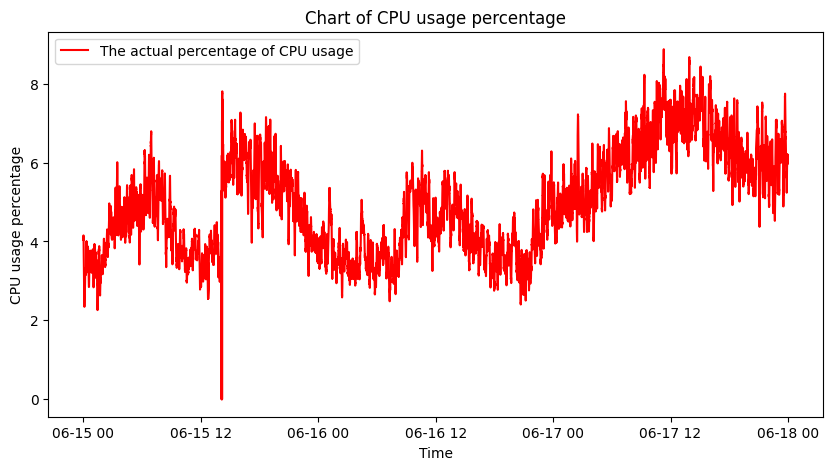

In [61]:
# Plotting a graph CPU usage percentage
plt.figure(figsize=(10, 5))
plt.plot(df1['service_avg_cpu_usage_percentage'], label='The actual percentage of CPU usage', color='red')
plt.title("Chart of CPU usage percentage")
plt.xlabel("Time")
plt.ylabel("CPU usage percentage")
plt.legend()
plt.show()

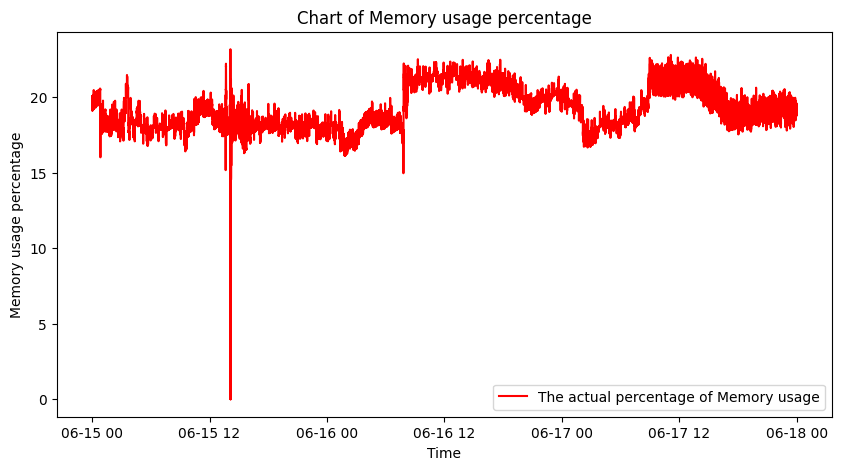

In [63]:
# Plotting a graph Memory usage percentage
plt.figure(figsize=(10, 5))
plt.plot(df1['service_avg_memory_usage_percentage'], label='The actual percentage of Memory usage', color='red')
plt.title("Chart of Memory usage percentage")
plt.xlabel("Time")
plt.ylabel("Memory usage percentage")
plt.legend()
plt.show()

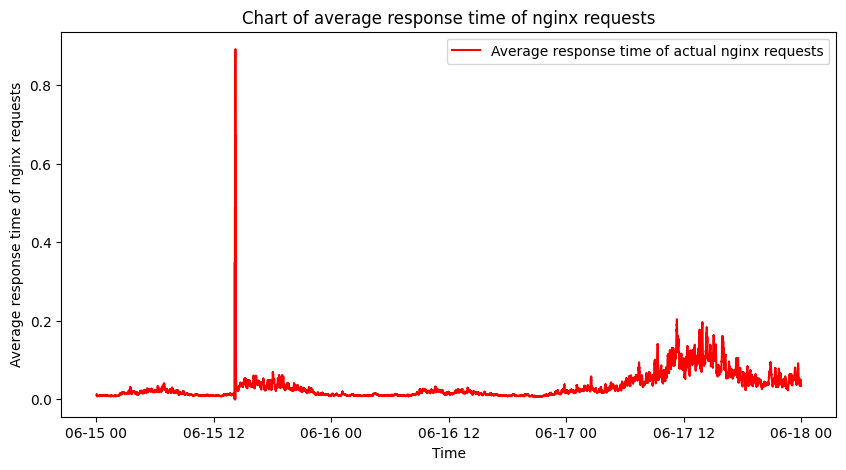

In [64]:
# Plotting a graph average response time of nginx requests
plt.figure(figsize=(10, 5))
plt.plot(df1['nginx_avg_respone_time'], label='Average response time of actual nginx requests', color='red')
plt.title("Chart of average response time of nginx requests")
plt.xlabel("Time")
plt.ylabel("Average response time of nginx requests")
plt.legend()
plt.show()

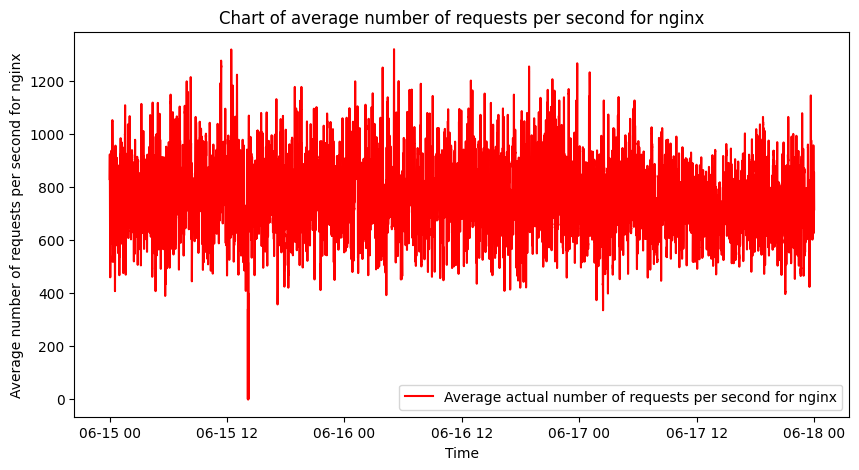

In [65]:
# Plotting a graph average number of requests per second for nginx
plt.figure(figsize=(10, 5))
plt.plot(df1['nginx_requests_per_second'], label='Average actual number of requests per second for nginx', color='red')
plt.title("Chart of average number of requests per second for nginx")
plt.xlabel("Time")
plt.ylabel("Average number of requests per second for nginx")
plt.legend()
plt.show()

In [17]:
import numpy as np

In [18]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3]]
    y.append(label)
  return np.array(X), np.array(y)

In [20]:
X, y = df_to_X_y(df1)
X.shape, y.shape

((51611, 7, 4), (51611, 4))

In [88]:
# #Defining test and train data sizes
# train_size = int(len(X)*0.7)
# val_size = int(len(X)*0.15)
# test_size = len(X) - train_size - val_size

In [89]:
# train_size, test_size, val_size

(36124, 7742, 7740)

In [21]:
X_train, y_train = X[:36000], y[:36000]
X_val, y_val = X[36000:42000], y[36000:42000]
X_test, y_test = X[42000:], y[42000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((36000, 7, 4), (36000, 4), (6000, 7, 4), (6000, 4), (9611, 7, 4), (9611, 4))

In [22]:
cpu_training_mean = np.mean(X_train[:, :, 0])
cpu_training_std = np.std(X_train[:, :, 0])

ram_training_mean = np.mean(X_train[:, :, 1])
ram_training_std = np.std(X_train[:, :, 1])

nginx_avg_respone_time_training_mean = np.mean(X_train[:, :, 2])
nginx_avg_respone_time_training_std = np.std(X_train[:, :, 2])

nginx_requests_per_second_training_mean = np.mean(X_train[:, :, 3])
nginx_requests_per_second_training_std = np.std(X_train[:, :, 3])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - cpu_training_mean) / cpu_training_std
  X[:, :, 1] = (X[:, :, 1] - ram_training_mean) / ram_training_std
  X[:, :, 2] = (X[:, :, 2] - nginx_avg_respone_time_training_mean) / nginx_avg_respone_time_training_std
  X[:, :, 3] = (X[:, :, 3] - nginx_requests_per_second_training_mean) / nginx_requests_per_second_training_std

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - cpu_training_mean) / cpu_training_std
  y[:, 1] = (y[:, 1] - ram_training_mean) / ram_training_std
  y[:, 2] = (y[:, 2] - nginx_avg_respone_time_training_mean) / nginx_avg_respone_time_training_std
  y[:, 3] = (y[:, 3] - nginx_requests_per_second_training_mean) / nginx_requests_per_second_training_std
  return y

In [23]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [24]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

array([[ 3.87668135,  1.34349428,  4.4424427 ,  0.52308983],
       [ 3.86796853,  1.67027961,  4.44888879,  0.44373095],
       [ 3.84571288,  1.04689395,  4.38458728,  0.40765873],
       ...,
       [ 1.70979762, -0.18806586,  0.69095811, -0.34264347],
       [ 1.69337479, -0.23006236,  0.67535435, -0.38593014],
       [ 1.67476274, -0.20118976,  0.66395737, -0.4292168 ]])

# Building and training the model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [26]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(8, 'relu'))
model.add(Dense(y_train.shape[1], 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 64)             17664     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 51,244
Trainable params: 51,244
Non-trainable params: 0
_________________________________________________________________


In [27]:
save_model = "save_model.hdf5"

In [28]:
best_model = ModelCheckpoint(save_model, save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, callbacks=[best_model])

Epoch 1/10
563/563 [==============================] - 15s 19ms/step - loss: 0.5948 - root_mean_squared_error: 0.7712 - val_loss: 0.3622 - val_root_mean_squared_error: 0.6018
Epoch 2/10
563/563 [==============================] - 10s 17ms/step - loss: 0.3540 - root_mean_squared_error: 0.5950 - val_loss: 0.1998 - val_root_mean_squared_error: 0.4469
Epoch 3/10
563/563 [==============================] - 9s 15ms/step - loss: 0.2760 - root_mean_squared_error: 0.5254 - val_loss: 0.1199 - val_root_mean_squared_error: 0.3462
Epoch 4/10
563/563 [==============================] - 9s 16ms/step - loss: 0.2343 - root_mean_squared_error: 0.4841 - val_loss: 0.0811 - val_root_mean_squared_error: 0.2847
Epoch 5/10
563/563 [==============================] - 9s 17ms/step - loss: 0.2079 - root_mean_squared_error: 0.4559 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2398
Epoch 6/10
563/563 [==============================] - 9s 16ms/step - loss: 0.1909 - root_mean_squared_error: 0.4369 - val_loss: 0.044

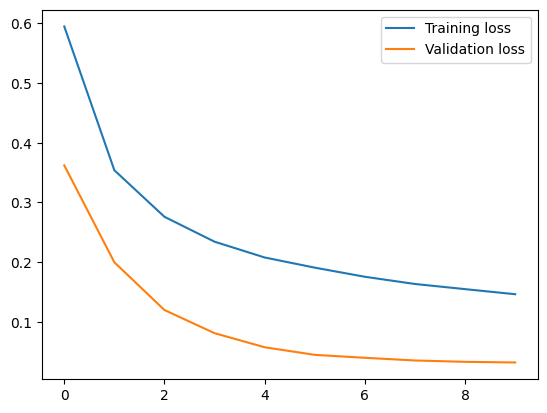

In [30]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# Using the model

In [32]:
from tensorflow.keras.models import load_model

In [33]:
final_model=load_model('save_model.hdf5')

In [35]:
def postprocess_cpu(arr):
  arr = (arr*cpu_training_std) + cpu_training_mean
  return arr

def postprocess_ram(arr):
  arr = (arr*ram_training_std) + ram_training_mean
  return arr


def postprocess_nginx_avg_res(arr):
  arr = (arr*nginx_avg_respone_time_training_std) + nginx_avg_respone_time_training_mean
  return arr

def postprocess_nginx_req_per(arr):
  arr = (arr*nginx_requests_per_second_training_std) + nginx_requests_per_second_training_mean
  return arr

In [34]:
def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  cpu_preds, ram_preds, nginx_avg_res_preds, nginx_req_per_preds = postprocess_cpu(predictions[:, 0]), postprocess_ram(predictions[:, 1]), postprocess_nginx_avg_res(predictions[:, 2]), postprocess_nginx_req_per(predictions[:, 3])
  cpu_actuals, ram_actuals, nginx_avg_res_actuals, nginx_req_per_actuals = postprocess_cpu(y[:, 0]), postprocess_ram(y[:, 1]), postprocess_nginx_avg_res(y[:, 2]), postprocess_nginx_req_per(y[:, 3])



  df = pd.DataFrame(data={'RAM Predictions': ram_preds,
                          'RAM Actuals':ram_actuals,
                          'CPU Predictions': cpu_preds,
                          'CPU Actuals': cpu_actuals,
                          'Nginx avg res Predictions': nginx_avg_res_preds,
                          'Nginx avg res Actuals': nginx_avg_res_actuals,
                          'Nginx req per Predictions':nginx_req_per_preds,
                          'Nginx req per Actuals': nginx_req_per_actuals,
                          })
  plt.plot(df['RAM Predictions'][start:end])
  plt.plot(df['RAM Actuals'][start:end])
  plt.plot(df['CPU Predictions'][start:end])
  plt.plot(df['CPU Actuals'][start:end])
  plt.plot(df['Nginx avg res Predictions'][start:end])
  plt.plot(df['Nginx avg res Actuals'][start:end])
  plt.plot(df['Nginx req per Predictions'][start:end])
  plt.plot(df['Nginx req per Actuals'][start:end])
  return df[start:end]

# Accuracy of the model

301/301 [==============================] - 2s 4ms/step


,RAM Predictions,RAM Actuals,CPU Predictions,CPU Actuals,Nginx avg res Predictions,Nginx avg res Actuals,Nginx req per Predictions,Nginx req per Actuals
0,20.756529,21.130859,7.309061,8.068479,0.107758,0.124084,883.938416,847.0
1,20.756392,21.617188,7.308348,8.060206,0.107683,0.124238,882.240540,836.0
2,20.778240,20.689453,7.311407,8.039075,0.107291,0.122704,876.111267,831.0
3,20.767572,21.041016,7.317852,8.027499,0.107086,0.123688,864.836853,828.0
4,20.753757,21.384766,7.321469,8.017434,0.106853,0.123261,856.108215,825.0
...,...,...,...,...,...,...,...,...
95,20.873753,21.376953,6.719884,6.998212,0.076908,0.090436,702.339539,688.0
96,20.863613,20.492188,6.716650,7.036827,0.077099,0.089714,695.287170,696.0
97,20.801907,20.640625,6.716993,7.032102,0.077652,0.089714,689.133728,696.0
98,20.806479,20.640625,6.698850,7.032102,0.077991,0.085805,687.230530,713.0


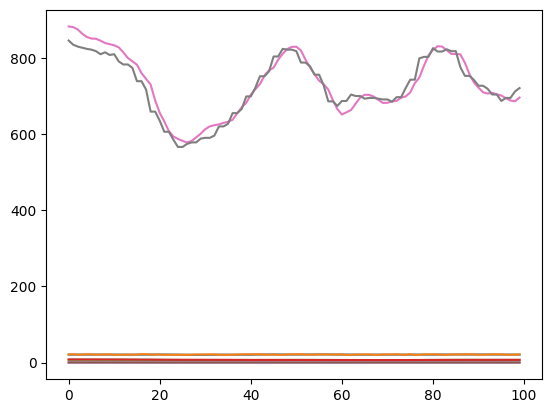

In [36]:
post_processed_df = plot_predictions(final_model, X_test, y_test)
post_processed_df

In [38]:
test_predictions = final_model.predict(X_test)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[:, 0], 'Actuals':y_test[:, 0]})
test_results

301/301 [==============================] - 1s 4ms/step


,Test Predictions,Actuals
0,3.076863,3.876681
1,3.076112,3.867969
2,3.079334,3.845713
3,3.086122,3.833522
4,3.089931,3.822921
...,...,...
9606,1.757347,1.776755
9607,1.733614,1.740982
9608,1.706870,1.709798
9609,1.672610,1.693375


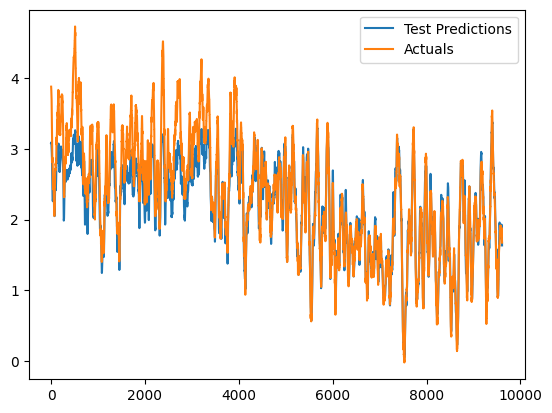

In [39]:
plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.legend()

301/301 [==============================] - 1s 4ms/step


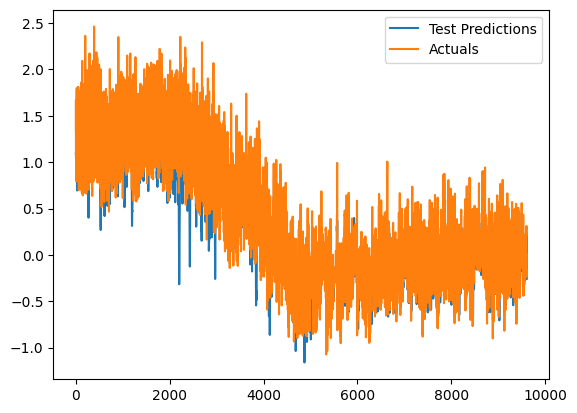

In [40]:
test_predictions = final_model.predict(X_test)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[:, 1], 'Actuals':y_test[:, 1]})
test_results

plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.legend()

301/301 [==============================] - 1s 4ms/step


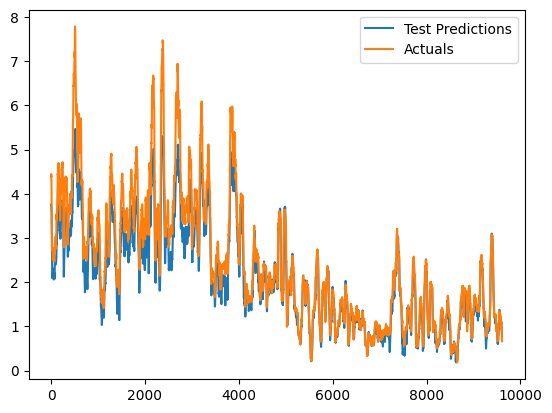

In [43]:
test_predictions = final_model.predict(X_test)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[:, 2], 'Actuals':y_test[:, 2]})
test_results

plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.legend()

301/301 [==============================] - 1s 4ms/step


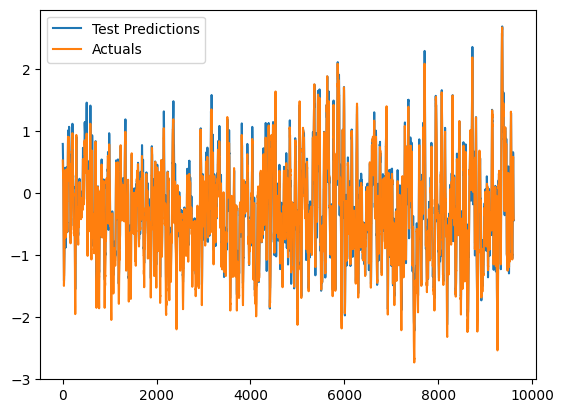

In [44]:
test_predictions = final_model.predict(X_test)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions[:, 3], 'Actuals':y_test[:, 3]})
test_results

plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.legend()

# Testing with real-world data

In [45]:
data_new = pd.read_csv('2023-06-13-06.csv')

In [47]:
data_new.index = pd.to_datetime(data_new['time'])

In [48]:
df_new = pd.concat([data_new['service_avg_cpu_usage_percentage'], data_new['service_avg_memory_usage_percentage'],
                       data_new['nginx_avg_respone_time'], data_new['nginx_requests_per_second']], axis=1)
df_new.head()

,service_avg_cpu_usage_percentage,service_avg_memory_usage_percentage,nginx_avg_respone_time,nginx_requests_per_second
time,,,,
2023-06-13 06:00:00,3.970130,18.640625,0.016216,937
2023-06-13 06:00:05,4.007566,18.640625,0.016216,937
2023-06-13 06:00:10,4.062307,18.740234,0.018456,960
2023-06-13 06:00:15,4.062307,18.740234,0.018391,973
2023-06-13 06:00:20,4.196123,18.621094,0.018391,973


In [49]:
data_X, data_y = df_to_X_y(df_new)
data_X.shape, data_y.shape

((710, 7, 4), (710, 4))

In [51]:
preprocess(data_X)
preprocess_output(data_y)

array([[-0.09282219, -0.35211471,  0.02092105,  1.78561757],
       [-0.10660226, -0.3403032 ,  0.01135458,  2.11026756],
       [-0.10660226, -0.3403032 ,  0.03047016,  2.17519756],
       ...,
       [-0.58638621, -0.28124561, -0.17854936,  1.73511646],
       [-0.4860432 , -0.31668016, -0.17854936,  1.73511646],
       [-0.47348786, -0.29830669, -0.19590237,  1.77840312]])

In [52]:
test_predictions = final_model.predict(data_X)
test_results = pd.DataFrame(data={'Test Predictions':postprocess_cpu(test_predictions[:, 0]), 'Actuals':postprocess_cpu(data_y[:, 0])})
test_results

23/23 [==============================] - 0s 5ms/step


,Test Predictions,Actuals
0,4.217196,4.299485
1,4.263619,4.286401
2,4.301250,4.286401
3,4.339836,4.405763
4,4.389336,4.433778
...,...,...
705,3.708354,3.748685
706,3.730267,3.830852
707,3.772428,3.830852
708,3.836617,3.926127


In [53]:
d = test_results.to_dict()
value1 = d['Test Predictions'][0]
value2 = d['Actuals'][0]

percent_difference = abs((value1 - value2) / ((value1 + value2) / 2)) * 100

print("Phần trăm độ lệch giữa hai thông số là: {:.2f}%".format(percent_difference))

Phần trăm độ lệch giữa hai thông số là: 1.93%


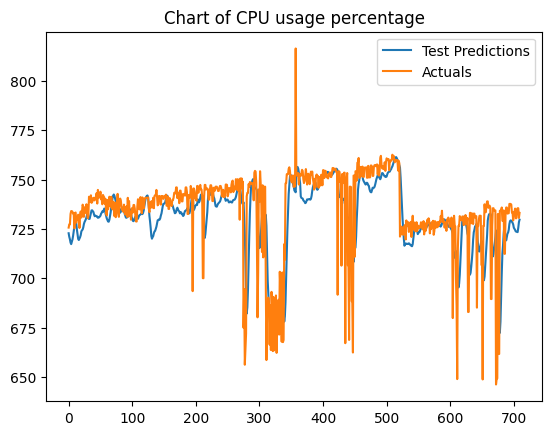

In [67]:
plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.title("Chart of CPU usage percentage")
plt.legend()

23/23 [==============================] - 0s 4ms/step


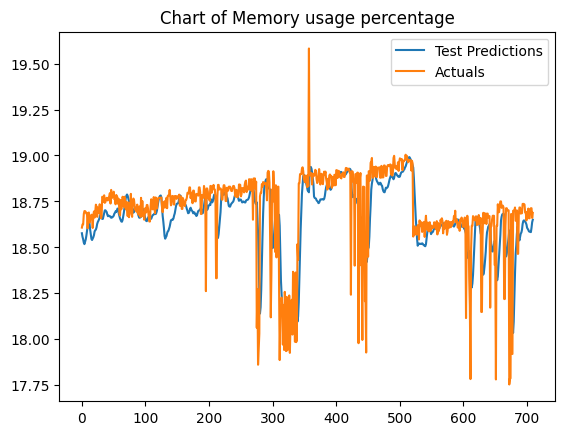

In [68]:
test_predictions = final_model.predict(data_X)
test_results = pd.DataFrame(data={'Test Predictions':postprocess_ram(test_predictions[:, 1]), 'Actuals':postprocess_ram(data_y[:, 1])})
test_results
plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.title("Chart of Memory usage percentage")
plt.legend()

23/23 [==============================] - 0s 4ms/step


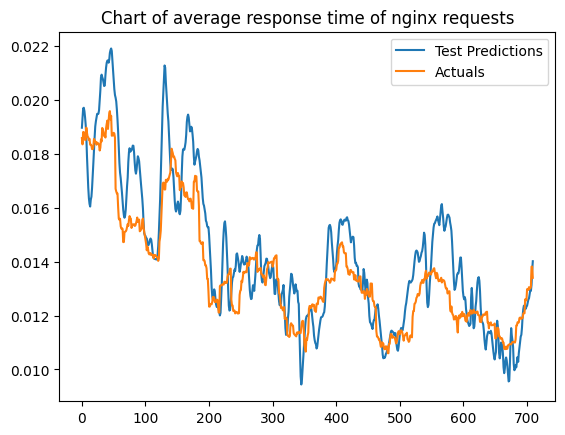

In [69]:
test_predictions = final_model.predict(data_X)
test_results = pd.DataFrame(data={'Test Predictions':postprocess_nginx_avg_res(test_predictions[:, 2]), 'Actuals':postprocess_nginx_avg_res(data_y[:, 2])})
test_results
plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.title("Chart of average response time of nginx requests")
plt.legend()

23/23 [==============================] - 0s 4ms/step


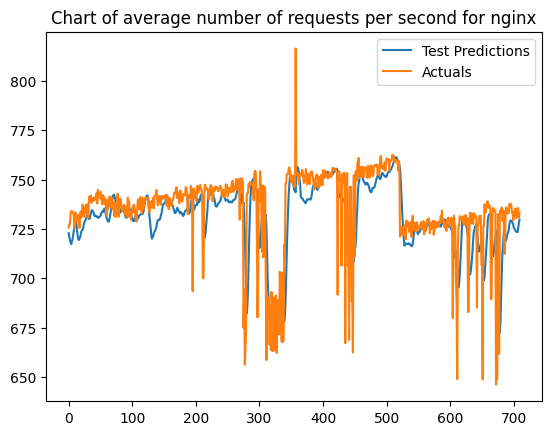

In [66]:
test_predictions = final_model.predict(data_X)
test_results = pd.DataFrame(data={'Test Predictions':postprocess_nginx_req_per(test_predictions[:, 1]), 'Actuals':postprocess_nginx_req_per(data_y[:, 1])})
test_results
plt.plot(test_results['Test Predictions'], label="Test Predictions")
plt.plot(test_results['Actuals'], label='Actuals')
plt.title("Chart of average number of requests per second for nginx")
plt.legend()